In [1]:
import pandas as pd
child = pd.read_csv("train.csv")
child

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


刪除欄位遺失值超過50%的變數

In [2]:
import pandas as pd

# 將指定的欄位刪除
column_name = [column for column in child.columns if 'PCIAT' in column]+['sii']
child_x = child.drop(columns=column_name)

# 計算每一行的遺失值數量
missing_counts = child_x.isnull().sum(axis=1)
threshold = child_x.shape[1] / 2

# 篩選出符合條件的行：保留遺失值少於等於閾值的行
child_cleaned_x = child_x[missing_counts <= threshold]

# 重置索引（可選）
child_cleaned_x = child_cleaned_x.reset_index(drop=True)

print(f"原始樣本數：{child_x.shape[0]}，處理後樣本數：{child_cleaned_x.shape[0]}")

原始樣本數：3960，處理後樣本數：2379


查看資料數量超過50%遺失值的變數

In [3]:
missing_percentage = child_cleaned_x.isnull().mean() * 100
missing_percentage[missing_percentage>50]

Physical-Waist_Circumference    72.719630
Fitness_Endurance-Season        57.082808
Fitness_Endurance-Max_Stage     69.146700
Fitness_Endurance-Time_Mins     69.272804
Fitness_Endurance-Time_Sec      69.272804
FGC-FGC_GSND                    56.116015
FGC-FGC_GSND_Zone               56.536360
FGC-FGC_GSD                     56.116015
FGC-FGC_GSD_Zone                56.494325
PAQ_A-Season                    85.582177
PAQ_A-PAQ_A_Total               85.582177
dtype: float64

保留資料遺失值不超過50%的變數

In [4]:
missing_percentage = child_cleaned_x.isnull().mean() * 100
low_missing_column = missing_percentage[missing_percentage < 50].index
child_cleaned_step1 = child_cleaned_x[low_missing_column]
child_cleaned_step1

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,39.4497,15.4107,27.0552,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,58.9338,26.4798,45.9966,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,79.6982,35.3804,63.1265,Spring,4.110,Summer,40.0,56.0,Spring,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,49.3301,20.2645,36.7181,Fall,3.440,Fall,41.0,58.0,Fall,2.0
2375,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,42.8185,18.0937,30.0453,NaN,NaN,Summer,48.0,67.0,Summer,0.0
2376,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,66.2889,29.7790,52.8320,Winter,3.260,Winter,35.0,50.0,Fall,1.0
2377,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,71.3903,28.7792,54.4630,Winter,2.729,Winter,56.0,77.0,Fall,0.0


In [5]:
print(child_cleaned_step1['BIA-BIA_BMI'].isnull().sum())
child_cleaned_step1['Physical-BMI'].isnull().sum()

413


16

In [6]:
import pandas as pd

# 假設你的數據已經加載到 DataFrame 中
# df = pd.read_csv('your_data.csv')

# 列出所有欄位名稱
print("Before dropping columns:", child_cleaned_step1.columns)
print("Before dropping columns:", len(child_cleaned_step1.columns))

# 刪除以 "Season" 結尾的欄位
columns_to_drop = [col for col in child_cleaned_step1.columns if col.endswith('Season')]
child_cleaned_step2 = child_cleaned_step1.drop(columns=columns_to_drop)

# 列出刪除後的欄位名稱
print("After dropping columns:", child_cleaned_step2.columns)
print("After dropping columns:", len(child_cleaned_step2.columns))


Before dropping columns: Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-Season',
       'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
       'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone',
       'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total', 'SDS-Season',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-Season',
       'PreInt_EduHx-computerinternet_hoursday'],
      dtyp

查看 child_cleaned_step2 的相關係數矩陣

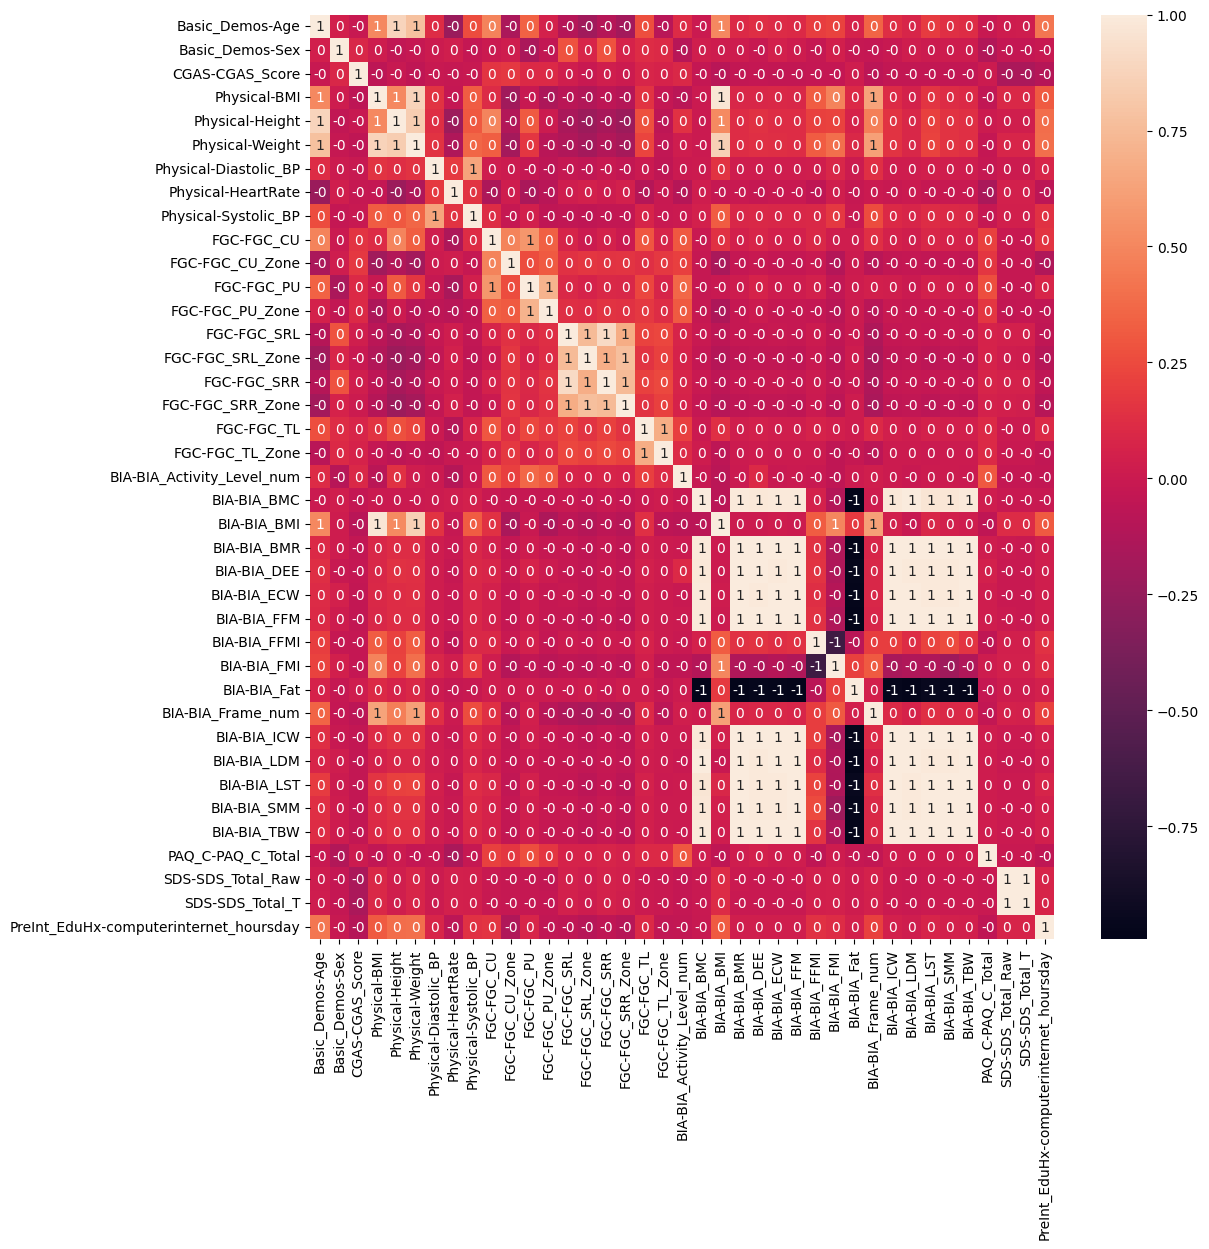

In [ ]:
# # 繪製 child_cleaned_step2 的相關係數矩陣
# import matplotlib.pyplot as plt
# import seaborn as sns
# correlation_matrix = child_cleaned_step2.drop(columns=['id']).corr()
# plt.figure(figsize=(12, 12))
# sns.heatmap(correlation_matrix, annot=True, fmt=".0f")
# plt.show()

In [8]:
# 打印出兩兩
# 找出那些 correlation > 0.9 或 < -0.9 的變數
correlation_pairs = correlation_matrix.unstack()
high_correlation = correlation_pairs[((correlation_pairs > 0.9) | (correlation_pairs < -0.9)) & (correlation_pairs != 1)]
high_correlation[:20]

Physical-BMI  BIA-BIA_BMI     0.968318
FGC-FGC_SRL   FGC-FGC_SRR     0.912651
FGC-FGC_SRR   FGC-FGC_SRL     0.912651
BIA-BIA_BMC   BIA-BIA_BMR     0.989278
              BIA-BIA_DEE     0.978312
              BIA-BIA_ECW     0.989112
              BIA-BIA_FFM     0.989278
              BIA-BIA_Fat    -0.991671
              BIA-BIA_ICW     0.978345
              BIA-BIA_LDM     0.993811
              BIA-BIA_LST     0.963414
              BIA-BIA_SMM     0.970672
              BIA-BIA_TBW     0.985761
BIA-BIA_BMI   Physical-BMI    0.968318
BIA-BIA_BMR   BIA-BIA_BMC     0.989278
              BIA-BIA_DEE     0.993174
              BIA-BIA_ECW     0.999142
              BIA-BIA_FFM     1.000000
              BIA-BIA_Fat    -0.977163
              BIA-BIA_ICW     0.997157
dtype: float64

刪除指定的欄位

In [9]:
step3_drop_columns_1 = ['Physical-Height', 'Physical-Weight', 'BIA-BIA_BMI', 'FGC-FGC_TL', 'FGC-FGC_CU', 'FGC-FGC_PU', 'FGC-FGC_SRL','FGC-FGC_SRR']
season = [column for column in child_cleaned_step2.columns if 'Season' in column]
step3_drop_columns_1 = step3_drop_columns_1 + season
child_cleaned_step3 = child_cleaned_step2.drop(columns=step3_drop_columns_1)
child_cleaned_step3

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU_Zone,FGC-FGC_PU_Zone,...,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,5,0,51.0,16.877316,NaN,NaN,NaN,0.0,0.0,...,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,3.0
1,000fd460,9,0,NaN,14.035590,75.0,70.0,122.0,0.0,0.0,...,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,2.340,46.0,64.0,0.0
2,00105258,10,1,71.0,16.648696,65.0,94.0,117.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.170,38.0,54.0,2.0
3,00115b9f,9,0,71.0,18.292347,60.0,97.0,117.0,1.0,0.0,...,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,2.451,31.0,45.0,0.0
4,001f3379,13,1,50.0,22.279952,60.0,73.0,102.0,0.0,0.0,...,2.0,32.9141,20.90200,79.6982,35.3804,63.1265,4.110,40.0,56.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,ff6c2bb8,8,0,NaN,17.139810,60.0,65.0,112.0,0.0,0.0,...,1.0,25.7118,15.81500,49.3301,20.2645,36.7181,3.440,41.0,58.0,2.0
2375,ff759544,7,1,NaN,13.927006,65.0,75.0,105.0,0.0,0.0,...,1.0,20.0572,15.14000,42.8185,18.0937,30.0453,NaN,48.0,67.0,0.0
2376,ff8a2de4,13,0,60.0,16.362460,71.0,70.0,104.0,0.0,1.0,...,1.0,33.3709,17.97970,66.2889,29.7790,52.8320,3.260,35.0,50.0,1.0
2377,ffcd4dbd,11,0,68.0,21.441500,79.0,99.0,116.0,1.0,0.0,...,2.0,33.9805,21.34030,71.3903,28.7792,54.4630,2.729,56.0,77.0,0.0


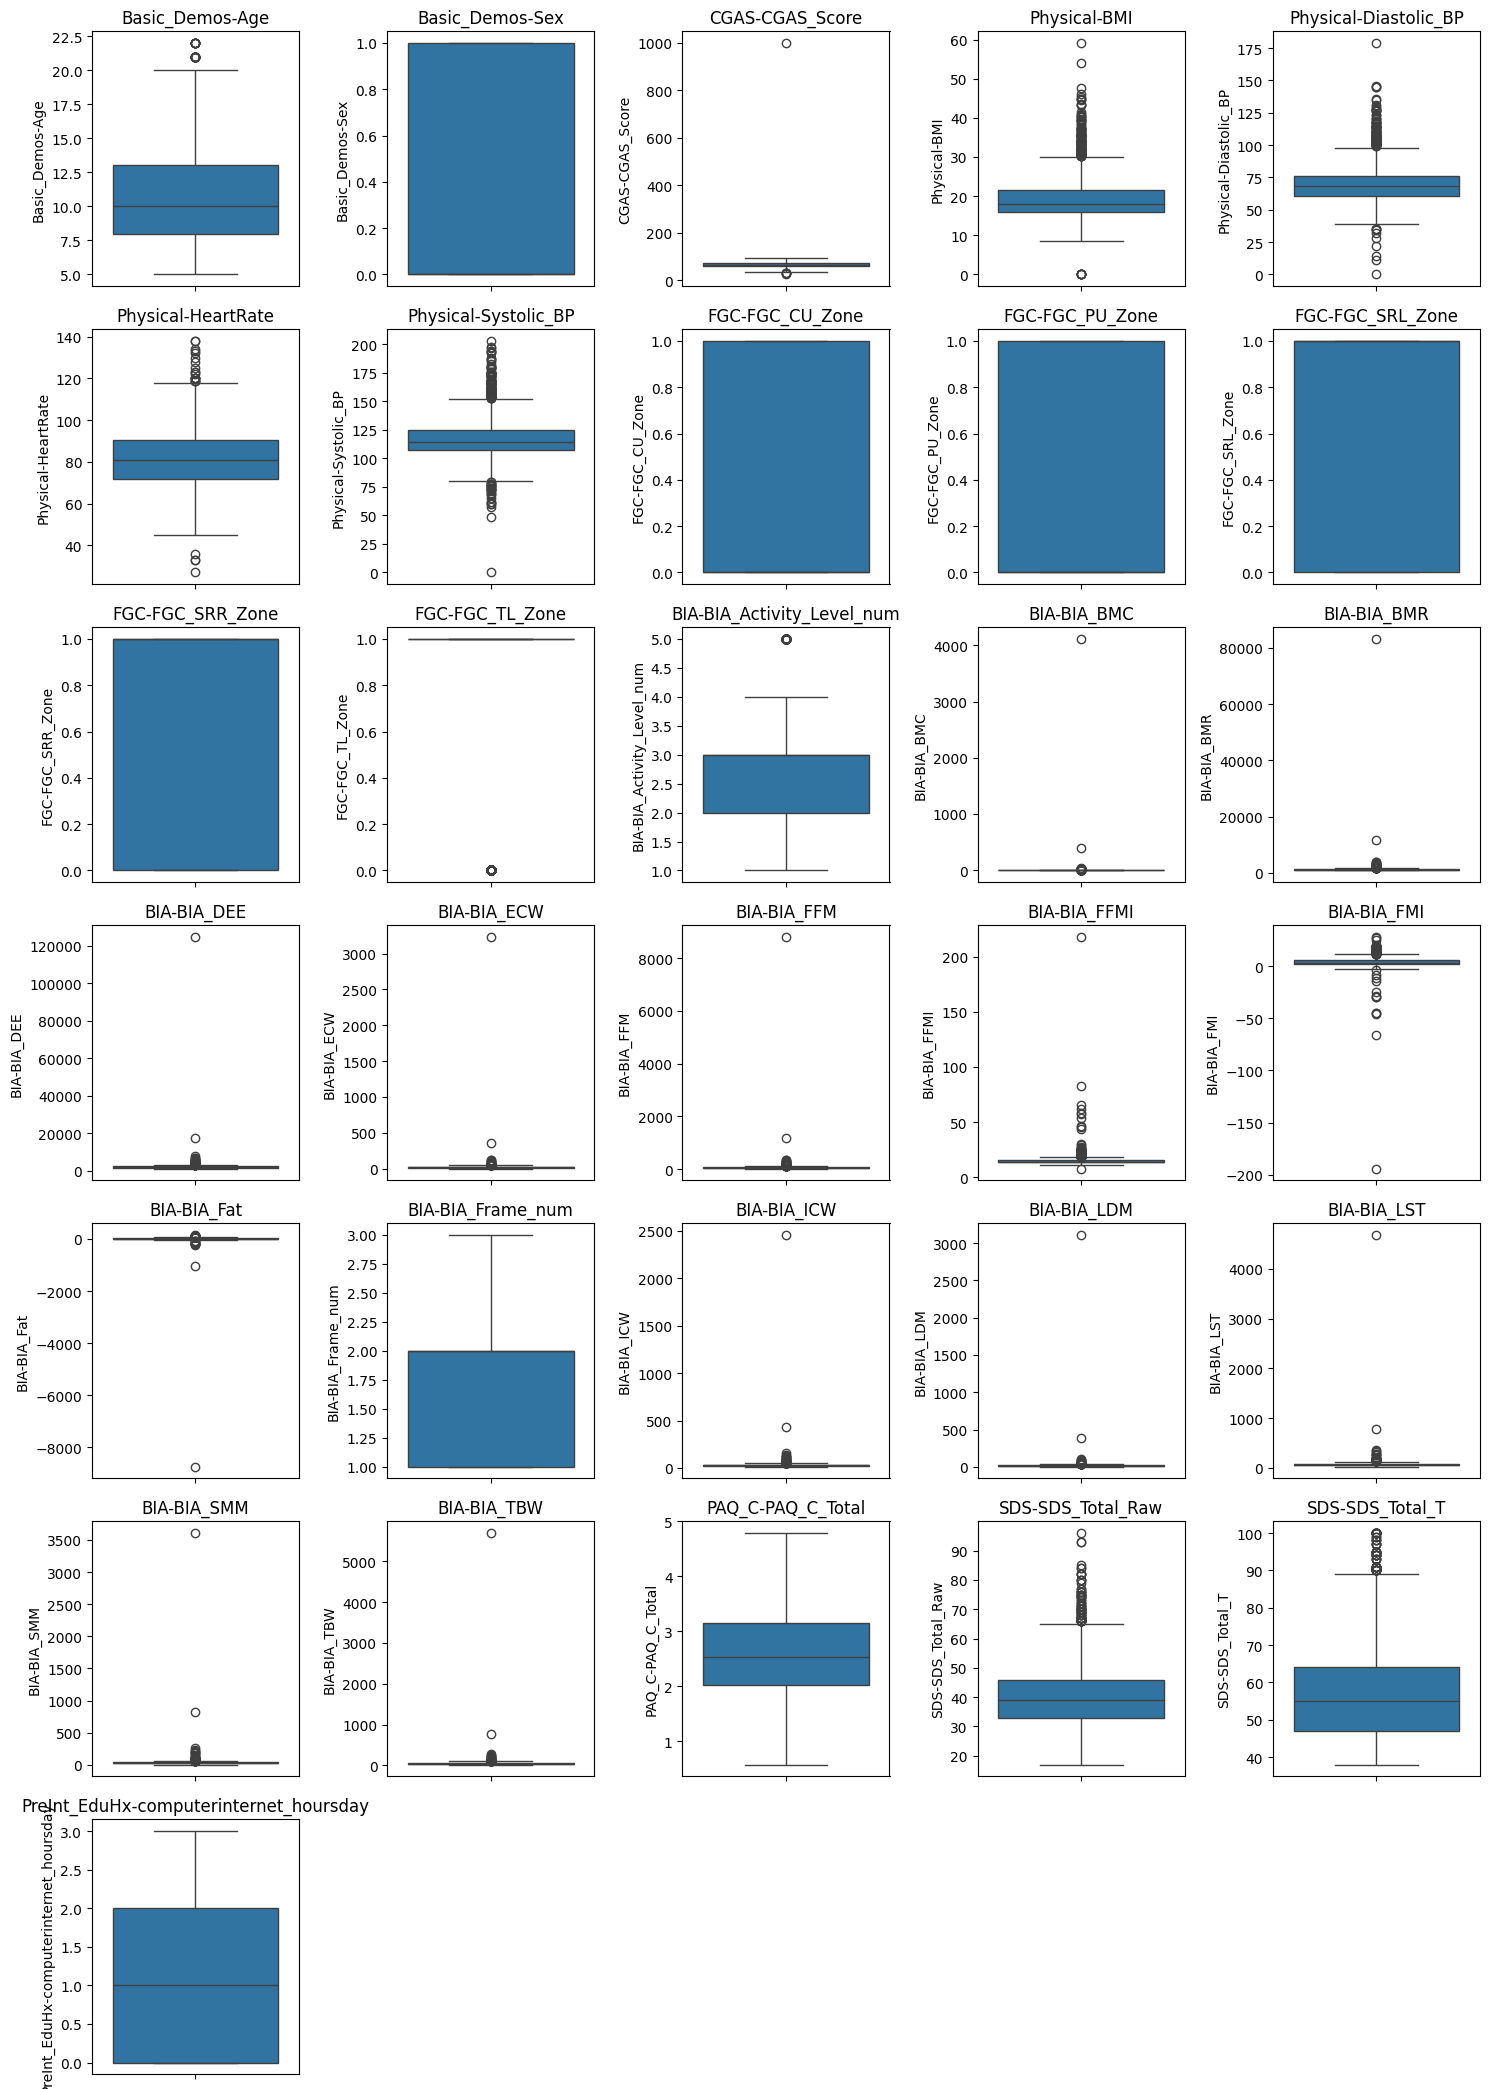

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 假設 df 是您的 DataFrame
# num_vars = child_cleaned_step3.select_dtypes(include=['float64', 'int64']).columns  # 選擇數值變數
# num_plots = len(num_vars)

# # 設定網格大小
# ncols = 5  # 每行顯示的箱型圖數量
# nrows = (num_plots // ncols) + (num_plots % ncols > 0)  # 根據變數數量計算行數

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))
# axes = axes.flatten()  # 將子圖的軸展開成一維陣列

# # 繪製每個變數的箱型圖
# for i, col in enumerate(num_vars):
#     sns.boxplot(data=child, y=col, ax=axes[i])
#     axes[i].set_title(col)

# # 隱藏多餘的子圖
# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)

# plt.tight_layout()
# plt.show()

In [11]:
# pip install miceforest

跑mice補遺失值

In [12]:
import miceforest as mf
import pandas as pd

# 假設有一個含有遺失值的 DataFrame
# Create kernel.
kds = mf.ImputationKernel(
  child_cleaned_step3.iloc[:,1:],
  random_state=1991
)

# Run the MICE algorithm for 2 iterations
kds.mice(2)

# Return the completed dataset.
child_cleaned_step3_nid = kds.complete_data()
child_cleaned_step3_id = child_cleaned_step3['id']
child_cleaned_step3 = pd.concat([child_cleaned_step3_id,child_cleaned_step3_nid],axis=1)
child_cleaned_step3

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU_Zone,FGC-FGC_PU_Zone,...,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,5,0,51.0,16.877316,72.0,95.0,106.0,0.0,0.0,...,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,2.100,29.0,58.0,3.0
1,000fd460,9,0,58.0,14.035590,75.0,70.0,122.0,0.0,0.0,...,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,2.340,46.0,64.0,0.0
2,00105258,10,1,71.0,16.648696,65.0,94.0,117.0,1.0,1.0,...,2.0,25.8907,18.34070,55.8515,35.6152,46.3265,2.170,38.0,54.0,2.0
3,00115b9f,9,0,71.0,18.292347,60.0,97.0,117.0,1.0,0.0,...,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,2.451,31.0,45.0,0.0
4,001f3379,13,1,50.0,22.279952,60.0,73.0,102.0,0.0,0.0,...,2.0,32.9141,20.90200,79.6982,35.3804,63.1265,4.110,40.0,56.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,ff6c2bb8,8,0,60.0,17.139810,60.0,65.0,112.0,0.0,0.0,...,1.0,25.7118,15.81500,49.3301,20.2645,36.7181,3.440,41.0,58.0,2.0
2375,ff759544,7,1,65.0,13.927006,65.0,75.0,105.0,0.0,0.0,...,1.0,20.0572,15.14000,42.8185,18.0937,30.0453,2.590,48.0,67.0,0.0
2376,ff8a2de4,13,0,60.0,16.362460,71.0,70.0,104.0,0.0,1.0,...,1.0,33.3709,17.97970,66.2889,29.7790,52.8320,3.260,35.0,50.0,1.0
2377,ffcd4dbd,11,0,68.0,21.441500,79.0,99.0,116.0,1.0,0.0,...,2.0,33.9805,21.34030,71.3903,28.7792,54.4630,2.729,56.0,77.0,0.0


In [13]:
child_cleaned_step3.columns

Index(['id', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score',
       'Physical-BMI', 'Physical-Diastolic_BP', 'Physical-HeartRate',
       'Physical-Systolic_BP', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU_Zone',
       'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMR',
       'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI',
       'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW',
       'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW',
       'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T',
       'PreInt_EduHx-computerinternet_hoursday'],
      dtype='object')

對 `child_cleaned_step3` 做 PCA

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

BIA_column = [column for column in child_cleaned_step3.columns if 'BIA' in column]
print(BIA_column)
child_bia = child_cleaned_step3[BIA_column]
scaler = StandardScaler()
bia_scaled = scaler.fit_transform(child_bia)

# 執行PCA降維
pca = PCA(n_components=4)
X_pca = pca.fit_transform(bia_scaled)

X_pca

['BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']


array([[-0.54449188, -0.15479469, -1.27558818, -0.47443722],
       [-0.55634684, -0.24906478, -1.40598016, -0.43761791],
       [-0.24034795, -0.01093491,  0.0819614 , -1.55600928],
       ...,
       [-0.0882002 , -0.31442026, -1.1283462 ,  0.4545045 ],
       [-0.07697803,  0.41362598,  0.30823092, -0.63783331],
       [ 0.40303303, -0.37654273,  0.21880703,  1.32749052]])

In [15]:
child_cleaned_step3['bia_pca_1'] = X_pca[:, 0]
child_cleaned_step3['bia_pca_2'] = X_pca[:, 1]
child_cleaned_step3['bia_pca_3'] = X_pca[:, 2]
child_cleaned_step3['bia_pca_4'] = X_pca[:, 3]
child_cleaned_step4 = child_cleaned_step3.loc[:, ~child_cleaned_step3.columns.isin(BIA_column)]

In [16]:
child_cleaned_step4.to_csv('x_clean.csv',index=False)

至此，清理完畢x

---

In [17]:
PCIAT_SII_column = [column for column in child.columns if 'PCIAT' in column]+['sii']+['id']
child_y = child[PCIAT_SII_column]
child_cleaned_id = child_cleaned_step4['id']
child_y = child_y.merge(child_cleaned_id, how='inner', on='id')
child_y.drop(columns=['PCIAT-Season'], inplace=True)
child_y

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,...,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii,id
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,2.0,00008ff9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000fd460
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,0.0,00105258
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,...,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,1.0,00115b9f
4,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0,1.0,001f3379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,2.0,2.0,1.0,22.0,0.0,ff6c2bb8
2375,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,3.0,3.0,3.0,0.0,33.0,1.0,ff759544
2376,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,...,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0,1.0,ff8a2de4
2377,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,...,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,1.0,ffcd4dbd


In [18]:
y_notna = child_y[child_y['sii'].notna()]
y_notna

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,...,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii,id
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,2.0,00008ff9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000fd460
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,0.0,00105258
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,...,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,1.0,00115b9f
4,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0,1.0,001f3379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,2.0,2.0,1.0,22.0,0.0,ff6c2bb8
2375,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,3.0,3.0,3.0,0.0,33.0,1.0,ff759544
2376,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,...,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0,1.0,ff8a2de4
2377,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,...,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,1.0,ffcd4dbd


In [19]:
y_notna_id = y_notna['id'].reset_index(drop=True)

In [20]:
PCIAT_1_20 = y_notna.iloc[:,:-3]
PCIAT_1_20

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0
4,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0
2375,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0
2376,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0
2377,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0


In [21]:
# implument missing values by k nearest neighbors from PCIAT-PCIAT_01 to PCIAT-PCIAT_20
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

PCIAT_1_20_no_na = imputer.fit_transform(PCIAT_1_20)
PCIAT_1_20_no_na = pd.DataFrame(PCIAT_1_20_no_na, columns=PCIAT_1_20.columns)
PCIAT_1_20_no_na

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0
4,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0
2117,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0
2118,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0
2119,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0


In [22]:
import numpy as np
for column in PCIAT_1_20_no_na.columns:
    PCIAT_1_20_no_na[column] = np.round(PCIAT_1_20_no_na[column], 0)

PCIAT_1_20_no_na

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0
4,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0
2117,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0
2118,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0
2119,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0


In [23]:
# calculate total score for PCIAT-PCIAT from 1 to 20
PCIAT_1_20_no_na['PCIAT-PCIAT_Total'] = PCIAT_1_20_no_na[PCIAT_1_20_no_na.columns].sum(axis=1)
PCIAT_1_20_total_no_na = PCIAT_1_20_no_na

In [24]:
PCIAT_1_20_total_no_na

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,...,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,...,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0
4,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0,22.0
2117,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0,33.0
2118,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,...,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0
2119,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,...,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0


In [25]:
import numpy as np

def sii_calculator(row):
    if row['PCIAT-PCIAT_Total'] <= 30:
        row['sii'] = 0
    elif row['PCIAT-PCIAT_Total'] <= 49:
        row['sii'] = 1
    elif row['PCIAT-PCIAT_Total'] <= 79:
        row['sii'] = 2
    else:
        row['sii'] = 3

    return row

child_y_no_na_id = PCIAT_1_20_total_no_na.apply(sii_calculator, axis=1)
child_y_no_na_id

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,...,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,0.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,...,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,1.0
4,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0,22.0,0.0
2117,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0,33.0,1.0
2118,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,...,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0,1.0
2119,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,...,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,1.0


In [26]:
child_y_cleaned = pd.concat([y_notna_id, child_y_no_na_id], axis=1)
child_y_cleaned

,id,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,...,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii
0,00008ff9,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,2.0
1,000fd460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00105258,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,0.0
3,00115b9f,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,...,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,1.0
4,001f3379,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,...,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,ff6c2bb8,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,...,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0,22.0,0.0
2117,ff759544,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,...,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0,33.0,1.0
2118,ff8a2de4,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,...,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0,1.0
2119,ffcd4dbd,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,...,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,1.0


In [27]:
child_y_cleaned.to_csv('y_clean.csv',index=False)

至此，y清理完畢
---

---

### **使用TabNet嘗試預測模型**

In [1]:
import pandas as pd
X = pd.read_csv('x_clean.csv')
y = pd.read_csv('y_clean.csv')

In [2]:
X

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU_Zone,FGC-FGC_PU_Zone,...,FGC-FGC_SRR_Zone,FGC-FGC_TL_Zone,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,bia_pca_1,bia_pca_2,bia_pca_3,bia_pca_4
0,00008ff9,5,0,51.0,16.877316,72.0,95.0,106.0,0.0,0.0,...,0.0,1.0,2.100,29.0,58.0,3.0,-0.544492,-0.154795,-1.275588,-0.474437
1,000fd460,9,0,58.0,14.035590,75.0,70.0,122.0,0.0,0.0,...,1.0,0.0,2.340,46.0,64.0,0.0,-0.556347,-0.249065,-1.405980,-0.437618
2,00105258,10,1,71.0,16.648696,65.0,94.0,117.0,1.0,1.0,...,1.0,0.0,2.170,38.0,54.0,2.0,-0.240348,-0.010935,0.081961,-1.556009
3,00115b9f,9,0,71.0,18.292347,60.0,97.0,117.0,1.0,0.0,...,0.0,1.0,2.451,31.0,45.0,0.0,-0.209105,0.140626,0.293831,0.326263
4,001f3379,13,1,50.0,22.279952,60.0,73.0,102.0,0.0,0.0,...,1.0,0.0,4.110,40.0,56.0,0.0,-0.050612,0.998159,0.669132,-0.725384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,ff6c2bb8,8,0,60.0,17.139810,60.0,65.0,112.0,0.0,0.0,...,1.0,1.0,3.440,41.0,58.0,2.0,-0.412461,-0.081657,-1.146586,0.467250
2375,ff759544,7,1,65.0,13.927006,65.0,75.0,105.0,0.0,0.0,...,0.0,0.0,2.590,48.0,67.0,0.0,-0.510824,-0.317985,-1.530034,-1.385078
2376,ff8a2de4,13,0,60.0,16.362460,71.0,70.0,104.0,0.0,1.0,...,1.0,1.0,3.260,35.0,50.0,1.0,-0.088200,-0.314420,-1.128346,0.454504
2377,ffcd4dbd,11,0,68.0,21.441500,79.0,99.0,116.0,1.0,0.0,...,1.0,1.0,2.729,56.0,77.0,0.0,-0.076978,0.413626,0.308231,-0.637833


In [3]:
y

,id,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,...,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii
0,00008ff9,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,2.0
1,000fd460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00105258,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,0.0
3,00115b9f,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,...,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,1.0
4,001f3379,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,...,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,ff6c2bb8,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,...,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0,22.0,0.0
2117,ff759544,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,...,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0,33.0,1.0
2118,ff8a2de4,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,...,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0,1.0
2119,ffcd4dbd,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,...,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,1.0


In [4]:
# 將 X 和 y 依照 id 合併，
data = X.merge(y, how='inner', on='id')
X_ = data[data.columns[1:-22]]
y_ = data[data.columns[-22:]]


直接預測sii

In [5]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


In [6]:
# Split the data into 80% train and 20% temp (which will be further split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X_, y_['sii'], test_size=0.2, random_state=42)

# Split the 20% temp into 10% validation and 10% test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Reshape y_train, y_valid, and y_test
# y_train = y_train.values.reshape(-1, 1)
# y_valid = y_valid.values.reshape(-1, 1)
# y_test = y_test.values.reshape(-1, 1)


In [21]:
y_train

1975    0.0
1569    1.0
767     2.0
1584    1.0
869     0.0
       ... 
1638    0.0
1095    0.0
1130    1.0
1294    0.0
860     0.0
Name: sii, Length: 1696, dtype: float64

In [14]:
class TabNetCustom(nn.Module):
    def __init__(self, input_dim, output_dim, n_d=64, n_a=64, n_steps=5, gamma=1.3, n_shared=2, n_independent=2):
        super(TabNetCustom, self).__init__()
        self.input_dim = input_dim  # 输入特征维度
        self.output_dim = output_dim  # 输出类别数
        self.n_d = n_d
        self.n_a = n_a
        self.n_steps = n_steps
        self.gamma = gamma

        # 第一层共享特征 Transformer，输入维度为 input_dim，输出维度为 2 * (n_d + n_a)
        self.shared_layers = nn.ModuleList([
            nn.Linear(input_dim, 2 * (n_d + n_a)) for _ in range(n_shared)
        ])

        # 独立特征 Transformer 层
        self.independent_layers = nn.ModuleList([
            nn.Linear(n_d + n_a, n_d + n_a) for _ in range(n_independent)
        ])

        # 注意力机制生成器，输入为 n_a，输出为 input_dim
        self.attention_layers = nn.ModuleList([
            nn.Linear(n_a, input_dim) for _ in range(n_steps)
        ])

        # 输出层，决策维度 n_d 映射到输出类别数
        self.output_layer = nn.Linear(n_d, output_dim)

    def feature_transformer(self, x):
        for layer in self.shared_layers:
            x = F.relu(layer(x))
        for layer in self.independent_layers:
            x = F.relu(layer(x))
        return x

    def sparse_attention(self, a):
        a = torch.sigmoid(a)
        return a / (a.sum(dim=1, keepdim=True) + 1e-5)

    def forward(self, x):
        decision_out = torch.zeros(x.size(0), self.n_d).to(x.device)
        a = x

        for step in range(self.n_steps):
            # Feature Transformer
            x_transformed = self.feature_transformer(x)

            # Attention Sparse Selection
            a = self.sparse_attention(self.attention_layers[step](x_transformed[:, self.n_d:]))
            x = x * a

            # 累加决策输出
            decision_out += x_transformed[:, :self.n_d]

        # 输出层
        output = self.output_layer(decision_out)
        return output


In [20]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score

def train_tabnet(model, train_loader, val_loader, criterion, optimizer, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # 验证集评估
        model.eval()
        with torch.no_grad():
            val_loss, val_acc = 0, 0
            for x_val, y_val in val_loader:
                x_val, y_val = x_val.to(device), y_val.to(device)
                outputs = model(x_val)
                val_loss += criterion(outputs, y_val).item()
                preds = outputs.argmax(dim=1)
                val_acc += accuracy_score(y_val.cpu(), preds.cpu())

        print(f"Epoch {epoch+1}: Val Loss = {val_loss:.4f}, Val Acc = {val_acc / len(val_loader):.4f}")
        model.train()

# 准备数据
train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32),
                              torch.tensor(y_train.values, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_valid.values, dtype=torch.float32),
                            torch.tensor(y_valid.values, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256)

# 定义模型、损失函数和优化器
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TabNetCustom(input_dim=X_train.shape[1], output_dim=len(y_train.unique())).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 开始训练
train_tabnet(model, train_loader, val_loader, criterion, optimizer)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (256x256 and 20x256)

In [ ]:
model.eval()
test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
test_preds = model(test_tensor).argmax(dim=1).cpu()

accuracy = accuracy_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds, average='weighted')

print(f"Test Accuracy: {accuracy}")
print(f"Test F1 Score: {f1}")


In [22]:
# Initialize and train the TabNet model
model = TabNetClassifier(optimizer_fn=torch.optim.Adam)

# Train the model
model.fit(
    X_train.values, y_train,
    eval_set=[(X_valid.values, y_valid)],
    max_epochs=1000,
    patience=100,
    batch_size=256,
    virtual_batch_size=256
)


c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.30381 | val_0_accuracy: 0.5283  |  0:00:00s
epoch 1  | loss: 1.08974 | val_0_accuracy: 0.44811 |  0:00:00s
epoch 2  | loss: 1.00503 | val_0_accuracy: 0.49057 |  0:00:00s
epoch 3  | loss: 0.95868 | val_0_accuracy: 0.41038 |  0:00:00s
epoch 4  | loss: 0.91197 | val_0_accuracy: 0.37264 |  0:00:00s
epoch 5  | loss: 0.88407 | val_0_accuracy: 0.40566 |  0:00:00s
epoch 6  | loss: 0.88597 | val_0_accuracy: 0.33019 |  0:00:00s
epoch 7  | loss: 0.88773 | val_0_accuracy: 0.31604 |  0:00:01s
epoch 8  | loss: 0.8702  | val_0_accuracy: 0.33491 |  0:00:01s
epoch 9  | loss: 0.87956 | val_0_accuracy: 0.31604 |  0:00:01s
epoch 10 | loss: 0.88643 | val_0_accuracy: 0.28774 |  0:00:01s
epoch 11 | loss: 0.85023 | val_0_accuracy: 0.33019 |  0:00:01s
epoch 12 | loss: 0.85024 | val_0_accuracy: 0.29245 |  0:00:01s
epoch 13 | loss: 0.84602 | val_0_accuracy: 0.33491 |  0:00:01s
epoch 14 | loss: 0.85084 | val_0_accuracy: 0.33019 |  0:00:01s
epoch 15 | loss: 0.85114 | val_0_accuracy: 0.33491 |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [18]:
# Predict the test set
predictions = model.predict(X_test.values)

# Calculate the Accuracy and F1 Score
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')

import pandas as pd

# Combine y_test and predictions
comparison_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predictions, name='Predicted_SII')], axis=1)
comparison_df.columns = ['Actual_SII', 'Predicted_SII']

# Display the comparison DataFrame
print(comparison_df)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")



     Actual_SII  Predicted_SII
0           1.0            0.0
1           0.0            2.0
2           0.0            0.0
3           0.0            2.0
4           1.0            0.0
..          ...            ...
208         3.0            2.0
209         0.0            0.0
210         2.0            2.0
211         1.0            0.0
212         0.0            0.0

[213 rows x 2 columns]
Accuracy: 0.539906103286385
F1 Score: 0.5180585421407163


預測total score 再算成sii

In [36]:
# Split the data into 80% train and 20% temp (which will be further split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X_, y_['PCIAT-PCIAT_Total'], test_size=0.2, random_state=42)

# Split the 20% temp into 10% validation and 10% test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape y_train, y_valid, and y_test
y_train = y_train.values.reshape(-1, 1)
y_valid = y_valid.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)


In [37]:
# Initialize and train the TabNet model
model = TabNetRegressor()

# Train the model
model.fit(
    X_train.values, y_train,
    eval_set=[(X_valid.values, y_valid)],
    max_epochs=1000,
    patience=50,
    batch_size=128,
    virtual_batch_size=128
)


c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1166.2684| val_0_mse: 1003.30419|  0:00:00s
epoch 1  | loss: 1026.4525| val_0_mse: 556.74463|  0:00:00s
epoch 2  | loss: 795.6715| val_0_mse: 486.37171|  0:00:01s
epoch 3  | loss: 517.87504| val_0_mse: 812.77062|  0:00:01s
epoch 4  | loss: 363.07476| val_0_mse: 878.9537|  0:00:02s
epoch 5  | loss: 322.22347| val_0_mse: 678.34131|  0:00:02s
epoch 6  | loss: 318.51785| val_0_mse: 536.42154|  0:00:03s
epoch 7  | loss: 331.01844| val_0_mse: 478.37723|  0:00:03s
epoch 8  | loss: 316.12642| val_0_mse: 436.93172|  0:00:04s
epoch 9  | loss: 315.6542| val_0_mse: 486.90687|  0:00:04s
epoch 10 | loss: 316.51581| val_0_mse: 461.84889|  0:00:05s
epoch 11 | loss: 314.9944| val_0_mse: 397.2067|  0:00:05s
epoch 12 | loss: 308.15159| val_0_mse: 398.53136|  0:00:06s
epoch 13 | loss: 312.30698| val_0_mse: 375.23821|  0:00:06s
epoch 14 | loss: 314.24815| val_0_mse: 363.63144|  0:00:06s
epoch 15 | loss: 311.31684| val_0_mse: 379.68316|  0:00:07s
epoch 16 | loss: 312.45112| val_0_mse: 358.1

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [38]:
# Predict the test set
predictions = model.predict(X_test.values)

# 將預測值依照sii分類
def sii_calculator(row):
    if row['PCIAT-PCIAT_Total'] <= 30:
        row['sii'] = 0
    elif row['PCIAT-PCIAT_Total'] <= 49:
        row['sii'] = 1
    elif row['PCIAT-PCIAT_Total'] <= 79:
        row['sii'] = 2
    else:
        row['sii'] = 3
    return row

# Convert y_test to DataFrame for applying the function
y_test_df = pd.DataFrame(y_test, columns=['PCIAT-PCIAT_Total'])
y_test_df = y_test_df.apply(sii_calculator, axis=1)

# Apply sii_calculator to both predictions and y_test
predictions = pd.DataFrame(predictions, columns=['PCIAT-PCIAT_Total'])
predictions = predictions.apply(sii_calculator, axis=1)

# Combine y_test_df and predictions for comparison
comparison_df = pd.concat([y_test_df.reset_index(drop=True), predictions.reset_index(drop=True)], axis=1)
comparison_df.columns = ['Actual_PCIAT_Total', 'Actual_SII', 'Predicted_PCIAT_Total', 'Predicted_SII']

# # Display the comparison DataFrame
# print(comparison_df)


In [39]:
comparison_df

,Actual_PCIAT_Total,Actual_SII,Predicted_PCIAT_Total,Predicted_SII
0,31.0,1.0,34.516556,1.0
1,25.0,0.0,36.759792,1.0
2,0.0,0.0,16.703543,0.0
3,19.0,0.0,38.472633,1.0
4,36.0,1.0,22.425476,0.0
...,...,...,...,...
208,87.0,3.0,39.363930,1.0
209,0.0,0.0,21.360096,0.0
210,67.0,2.0,43.728580,1.0
211,36.0,1.0,36.512222,1.0


In [40]:
# Extract the 'sii' column for comparison
predicted_sii = predictions['sii']
actual_sii = y_test_df['sii']

# 計算sii的準確率
accuracy = accuracy_score(actual_sii, predicted_sii)
f1 = f1_score(actual_sii, predicted_sii, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.5258215962441315
F1 Score: 0.503290449769323


預測PCIAT01-PCIAT20的值 再將它們相加成total 最後一樣分類成sii

In [41]:
# 將 X 和 y 依照 id 合併，
data = X.merge(y, how='inner', on='id')
# 提取特徵和目標
X_ = data[data.columns[1:-22]]
y_ = data[data.columns[-22:-2]]

In [42]:
X_

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU_Zone,FGC-FGC_PU_Zone,FGC-FGC_SRL_Zone,FGC-FGC_SRR_Zone,FGC-FGC_TL_Zone,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,bia_pca_1,bia_pca_2,bia_pca_3,bia_pca_4
0,5,0,51.0,16.877316,72.0,95.0,106.0,0.0,0.0,0.0,0.0,1.0,2.100,29.0,58.0,3.0,-0.544492,-0.154795,-1.275588,-0.474437
1,9,0,58.0,14.035590,75.0,70.0,122.0,0.0,0.0,1.0,1.0,0.0,2.340,46.0,64.0,0.0,-0.556347,-0.249065,-1.405980,-0.437618
2,10,1,71.0,16.648696,65.0,94.0,117.0,1.0,1.0,1.0,1.0,0.0,2.170,38.0,54.0,2.0,-0.240348,-0.010935,0.081961,-1.556009
3,9,0,71.0,18.292347,60.0,97.0,117.0,1.0,0.0,0.0,0.0,1.0,2.451,31.0,45.0,0.0,-0.209105,0.140626,0.293831,0.326263
4,13,1,50.0,22.279952,60.0,73.0,102.0,0.0,0.0,1.0,1.0,0.0,4.110,40.0,56.0,0.0,-0.050612,0.998159,0.669132,-0.725384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,8,0,60.0,17.139810,60.0,65.0,112.0,0.0,0.0,1.0,1.0,1.0,3.440,41.0,58.0,2.0,-0.412461,-0.081657,-1.146586,0.467250
2117,7,1,65.0,13.927006,65.0,75.0,105.0,0.0,0.0,0.0,0.0,0.0,2.590,48.0,67.0,0.0,-0.510824,-0.317985,-1.530034,-1.385078
2118,13,0,60.0,16.362460,71.0,70.0,104.0,0.0,1.0,1.0,1.0,1.0,3.260,35.0,50.0,1.0,-0.088200,-0.314420,-1.128346,0.454504
2119,11,0,68.0,21.441500,79.0,99.0,116.0,1.0,0.0,1.0,1.0,1.0,2.729,56.0,77.0,0.0,-0.076978,0.413626,0.308231,-0.637833


In [43]:
y_

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0
4,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0
2117,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0
2118,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0
2119,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0


In [44]:
# Split the data into 80% train and 20% temp (which will be further split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X_, y_, test_size=0.2, random_state=42)

# Split the 20% temp into 10% validation and 10% test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize lists to store results
predictions_list = []

# Train and predict for each target column separately
for target in y_.columns:
    print(f"Training model for {target}...")
    
    # Initialize the TabNet model
    model = TabNetClassifier()
    
    # Train the model
    model.fit(
        X_train.values, y_train[target].values,
        eval_set=[(X_valid.values, y_valid[target].values)],
        max_epochs=1000,
        patience=50,
        batch_size=128,
        virtual_batch_size=128
    )
    
    # Predict the test set for the current target
    predictions = model.predict(X_test.values)
    predictions_list.append(predictions)
    
    # Evaluate the model for the current target
    accuracy = accuracy_score(y_test[target].values, predictions)
    f1 = f1_score(y_test[target].values, predictions, average='weighted')
    
    print(f"Accuracy for {target}: {accuracy}")
    print(f"F1 Score for {target}: {f1}")

# Combine predictions for all targets into a DataFrame
predictions_df = pd.DataFrame(np.array(predictions_list).T, columns=y_.columns)


Training model for PCIAT-PCIAT_01...


c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.93748 | val_0_accuracy: 0.12736 |  0:00:00s
epoch 1  | loss: 1.7892  | val_0_accuracy: 0.17925 |  0:00:00s
epoch 2  | loss: 1.78799 | val_0_accuracy: 0.16509 |  0:00:01s
epoch 3  | loss: 1.77139 | val_0_accuracy: 0.18868 |  0:00:01s
epoch 4  | loss: 1.75911 | val_0_accuracy: 0.16509 |  0:00:02s
epoch 5  | loss: 1.74194 | val_0_accuracy: 0.1934  |  0:00:02s
epoch 6  | loss: 1.73298 | val_0_accuracy: 0.2217  |  0:00:03s
epoch 7  | loss: 1.7282  | val_0_accuracy: 0.16981 |  0:00:03s
epoch 8  | loss: 1.7264  | val_0_accuracy: 0.20283 |  0:00:03s
epoch 9  | loss: 1.74105 | val_0_accuracy: 0.18868 |  0:00:04s
epoch 10 | loss: 1.71893 | val_0_accuracy: 0.25943 |  0:00:04s
epoch 11 | loss: 1.71831 | val_0_accuracy: 0.25    |  0:00:05s
epoch 12 | loss: 1.71336 | val_0_accuracy: 0.22642 |  0:00:05s
epoch 13 | loss: 1.70806 | val_0_accuracy: 0.22642 |  0:00:06s
epoch 14 | loss: 1.70941 | val_0_accuracy: 0.23113 |  0:00:06s
epoch 15 | loss: 1.70635 | val_0_accuracy: 0.19811 |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Accuracy for PCIAT-PCIAT_01: 0.26291079812206575
F1 Score for PCIAT-PCIAT_01: 0.24530193516957075
Training model for PCIAT-PCIAT_02...
epoch 0  | loss: 1.91325 | val_0_accuracy: 0.15094 |  0:00:00s
epoch 1  | loss: 1.79039 | val_0_accuracy: 0.18396 |  0:00:00s
epoch 2  | loss: 1.73609 | val_0_accuracy: 0.19811 |  0:00:00s
epoch 3  | loss: 1.71685 | val_0_accuracy: 0.16509 |  0:00:00s
epoch 4  | loss: 1.69876 | val_0_accuracy: 0.17453 |  0:00:00s
epoch 5  | loss: 1.69594 | val_0_accuracy: 0.20755 |  0:00:01s
epoch 6  | loss: 1.68358 | val_0_accuracy: 0.16981 |  0:00:01s
epoch 7  | loss: 1.67149 | val_0_accuracy: 0.19811 |  0:00:01s
epoch 8  | loss: 1.67994 | val_0_accuracy: 0.23113 |  0:00:01s
epoch 9  | loss: 1.66389 | val_0_accuracy: 0.24528 |  0:00:01s
epoch 10 | loss: 1.65394 | val_0_accuracy: 0.28774 |  0:00:01s
epoch 11 | loss: 1.65418 | val_0_accuracy: 0.27358 |  0:00:02s
epoch 12 | loss: 1.65416 | val_0_accuracy: 0.28774 |  0:00:02s
epoch 13 | loss: 1.64614 | val_0_accuracy: 0.2

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Accuracy for PCIAT-PCIAT_02: 0.29107981220657275
F1 Score for PCIAT-PCIAT_02: 0.25302266850764943
Training model for PCIAT-PCIAT_03...
epoch 0  | loss: 1.92035 | val_0_accuracy: 0.23113 |  0:00:00s
epoch 1  | loss: 1.77725 | val_0_accuracy: 0.24528 |  0:00:00s
epoch 2  | loss: 1.75338 | val_0_accuracy: 0.25    |  0:00:00s
epoch 3  | loss: 1.73534 | val_0_accuracy: 0.17453 |  0:00:00s
epoch 4  | loss: 1.73346 | val_0_accuracy: 0.21226 |  0:00:00s
epoch 5  | loss: 1.71309 | val_0_accuracy: 0.23585 |  0:00:01s
epoch 6  | loss: 1.70269 | val_0_accuracy: 0.2217  |  0:00:01s
epoch 7  | loss: 1.69583 | val_0_accuracy: 0.28774 |  0:00:01s
epoch 8  | loss: 1.67672 | val_0_accuracy: 0.28302 |  0:00:01s
epoch 9  | loss: 1.66728 | val_0_accuracy: 0.28302 |  0:00:01s
epoch 10 | loss: 1.67819 | val_0_accuracy: 0.26415 |  0:00:01s
epoch 11 | loss: 1.67639 | val_0_accuracy: 0.19811 |  0:00:02s
epoch 12 | loss: 1.66714 | val_0_accuracy: 0.22642 |  0:00:02s
epoch 13 | loss: 1.66136 | val_0_accuracy: 0.2

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Accuracy for PCIAT-PCIAT_03: 0.27699530516431925
F1 Score for PCIAT-PCIAT_03: 0.253364918798579
Training model for PCIAT-PCIAT_04...
epoch 0  | loss: 1.77868 | val_0_accuracy: 0.34906 |  0:00:00s
epoch 1  | loss: 1.28769 | val_0_accuracy: 0.38208 |  0:00:00s
epoch 2  | loss: 1.21774 | val_0_accuracy: 0.37736 |  0:00:00s
epoch 3  | loss: 1.16889 | val_0_accuracy: 0.41981 |  0:00:00s
epoch 4  | loss: 1.14436 | val_0_accuracy: 0.45283 |  0:00:00s
epoch 5  | loss: 1.12517 | val_0_accuracy: 0.48113 |  0:00:01s
epoch 6  | loss: 1.11915 | val_0_accuracy: 0.44811 |  0:00:01s
epoch 7  | loss: 1.10504 | val_0_accuracy: 0.46698 |  0:00:01s
epoch 8  | loss: 1.10718 | val_0_accuracy: 0.48113 |  0:00:01s
epoch 9  | loss: 1.10161 | val_0_accuracy: 0.5566  |  0:00:01s
epoch 10 | loss: 1.10442 | val_0_accuracy: 0.56604 |  0:00:01s
epoch 11 | loss: 1.09247 | val_0_accuracy: 0.54717 |  0:00:02s
epoch 12 | loss: 1.08953 | val_0_accuracy: 0.55189 |  0:00:02s
epoch 13 | loss: 1.09294 | val_0_accuracy: 0.542

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.92701 | val_0_accuracy: 0.25    |  0:00:00s
epoch 1  | loss: 1.79538 | val_0_accuracy: 0.25943 |  0:00:00s
epoch 2  | loss: 1.74288 | val_0_accuracy: 0.21698 |  0:00:00s
epoch 3  | loss: 1.7207  | val_0_accuracy: 0.22642 |  0:00:00s
epoch 4  | loss: 1.70583 | val_0_accuracy: 0.21698 |  0:00:00s
epoch 5  | loss: 1.70713 | val_0_accuracy: 0.2217  |  0:00:01s
epoch 6  | loss: 1.68257 | val_0_accuracy: 0.19811 |  0:00:01s
epoch 7  | loss: 1.67883 | val_0_accuracy: 0.16981 |  0:00:01s
epoch 8  | loss: 1.68155 | val_0_accuracy: 0.21226 |  0:00:01s
epoch 9  | loss: 1.67437 | val_0_accuracy: 0.23585 |  0:00:01s
epoch 10 | loss: 1.6567  | val_0_accuracy: 0.25    |  0:00:01s
epoch 11 | loss: 1.66411 | val_0_accuracy: 0.24528 |  0:00:02s
epoch 12 | loss: 1.6749  | val_0_accuracy: 0.2217  |  0:00:02s
epoch 13 | loss: 1.65917 | val_0_accuracy: 0.28302 |  0:00:02s
epoch 14 | loss: 1.64726 | val_0_accuracy: 0.27358 |  0:00:02s
epoch 15 | loss: 1.65522 | val_0_accuracy: 0.26887 |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.87765 | val_0_accuracy: 0.41981 |  0:00:00s
epoch 1  | loss: 1.45058 | val_0_accuracy: 0.32075 |  0:00:00s
epoch 2  | loss: 1.33968 | val_0_accuracy: 0.42453 |  0:00:00s
epoch 3  | loss: 1.31415 | val_0_accuracy: 0.36321 |  0:00:00s
epoch 4  | loss: 1.28541 | val_0_accuracy: 0.36792 |  0:00:00s
epoch 5  | loss: 1.27636 | val_0_accuracy: 0.28302 |  0:00:01s
epoch 6  | loss: 1.28031 | val_0_accuracy: 0.32547 |  0:00:01s
epoch 7  | loss: 1.27607 | val_0_accuracy: 0.40094 |  0:00:01s
epoch 8  | loss: 1.25988 | val_0_accuracy: 0.32547 |  0:00:01s
epoch 9  | loss: 1.25592 | val_0_accuracy: 0.38208 |  0:00:01s
epoch 10 | loss: 1.24318 | val_0_accuracy: 0.41038 |  0:00:02s
epoch 11 | loss: 1.25465 | val_0_accuracy: 0.44811 |  0:00:02s
epoch 12 | loss: 1.23993 | val_0_accuracy: 0.4434  |  0:00:02s
epoch 13 | loss: 1.24153 | val_0_accuracy: 0.42925 |  0:00:02s
epoch 14 | loss: 1.24727 | val_0_accuracy: 0.4717  |  0:00:02s
epoch 15 | loss: 1.23546 | val_0_accuracy: 0.47642 |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Accuracy for PCIAT-PCIAT_06: 0.539906103286385
F1 Score for PCIAT-PCIAT_06: 0.4946953893179609
Training model for PCIAT-PCIAT_07...
epoch 0  | loss: 1.6061  | val_0_accuracy: 0.38679 |  0:00:00s
epoch 1  | loss: 0.99727 | val_0_accuracy: 0.40566 |  0:00:00s
epoch 2  | loss: 0.9493  | val_0_accuracy: 0.41981 |  0:00:00s
epoch 3  | loss: 0.89506 | val_0_accuracy: 0.40566 |  0:00:00s
epoch 4  | loss: 0.86233 | val_0_accuracy: 0.50943 |  0:00:00s
epoch 5  | loss: 0.82234 | val_0_accuracy: 0.51415 |  0:00:01s
epoch 6  | loss: 0.82794 | val_0_accuracy: 0.60377 |  0:00:01s
epoch 7  | loss: 0.82539 | val_0_accuracy: 0.59906 |  0:00:01s
epoch 8  | loss: 0.81874 | val_0_accuracy: 0.55189 |  0:00:01s
epoch 9  | loss: 0.81618 | val_0_accuracy: 0.57547 |  0:00:01s
epoch 10 | loss: 0.81088 | val_0_accuracy: 0.61321 |  0:00:02s
epoch 11 | loss: 0.80714 | val_0_accuracy: 0.62264 |  0:00:02s
epoch 12 | loss: 0.80273 | val_0_accuracy: 0.64151 |  0:00:02s
epoch 13 | loss: 0.81339 | val_0_accuracy: 0.6320

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Accuracy for PCIAT-PCIAT_07: 0.647887323943662
F1 Score for PCIAT-PCIAT_07: 0.6163375426010058
Training model for PCIAT-PCIAT_08...
epoch 0  | loss: 1.89525 | val_0_accuracy: 0.23585 |  0:00:00s
epoch 1  | loss: 1.544   | val_0_accuracy: 0.24057 |  0:00:00s
epoch 2  | loss: 1.47921 | val_0_accuracy: 0.29245 |  0:00:00s
epoch 3  | loss: 1.43482 | val_0_accuracy: 0.32075 |  0:00:00s
epoch 4  | loss: 1.42577 | val_0_accuracy: 0.31132 |  0:00:01s
epoch 5  | loss: 1.40014 | val_0_accuracy: 0.29717 |  0:00:01s
epoch 6  | loss: 1.4138  | val_0_accuracy: 0.35377 |  0:00:01s
epoch 7  | loss: 1.38473 | val_0_accuracy: 0.32547 |  0:00:01s
epoch 8  | loss: 1.3991  | val_0_accuracy: 0.29717 |  0:00:01s
epoch 9  | loss: 1.39052 | val_0_accuracy: 0.30189 |  0:00:02s
epoch 10 | loss: 1.3789  | val_0_accuracy: 0.34434 |  0:00:02s
epoch 11 | loss: 1.37513 | val_0_accuracy: 0.30189 |  0:00:02s
epoch 12 | loss: 1.36868 | val_0_accuracy: 0.33962 |  0:00:02s
epoch 13 | loss: 1.3555  | val_0_accuracy: 0.3820

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.84452 | val_0_accuracy: 0.33962 |  0:00:00s
epoch 1  | loss: 1.42404 | val_0_accuracy: 0.35849 |  0:00:00s
epoch 2  | loss: 1.34092 | val_0_accuracy: 0.35377 |  0:00:00s
epoch 3  | loss: 1.29734 | val_0_accuracy: 0.28774 |  0:00:00s
epoch 4  | loss: 1.27598 | val_0_accuracy: 0.35849 |  0:00:00s
epoch 5  | loss: 1.27277 | val_0_accuracy: 0.29245 |  0:00:01s
epoch 6  | loss: 1.25906 | val_0_accuracy: 0.28774 |  0:00:01s
epoch 7  | loss: 1.25392 | val_0_accuracy: 0.38208 |  0:00:01s
epoch 8  | loss: 1.24195 | val_0_accuracy: 0.43396 |  0:00:01s
epoch 9  | loss: 1.24002 | val_0_accuracy: 0.4434  |  0:00:01s
epoch 10 | loss: 1.236   | val_0_accuracy: 0.43396 |  0:00:01s
epoch 11 | loss: 1.24579 | val_0_accuracy: 0.45755 |  0:00:02s
epoch 12 | loss: 1.23117 | val_0_accuracy: 0.4717  |  0:00:02s
epoch 13 | loss: 1.24003 | val_0_accuracy: 0.5     |  0:00:02s
epoch 14 | loss: 1.23611 | val_0_accuracy: 0.48113 |  0:00:02s
epoch 15 | loss: 1.22287 | val_0_accuracy: 0.4717  |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Accuracy for PCIAT-PCIAT_09: 0.5164319248826291
F1 Score for PCIAT-PCIAT_09: 0.4611850341248004
Training model for PCIAT-PCIAT_10...
epoch 0  | loss: 1.89035 | val_0_accuracy: 0.2217  |  0:00:00s
epoch 1  | loss: 1.59661 | val_0_accuracy: 0.25943 |  0:00:00s
epoch 2  | loss: 1.52282 | val_0_accuracy: 0.26415 |  0:00:00s
epoch 3  | loss: 1.49862 | val_0_accuracy: 0.21226 |  0:00:00s
epoch 4  | loss: 1.4707  | val_0_accuracy: 0.32547 |  0:00:00s
epoch 5  | loss: 1.45949 | val_0_accuracy: 0.26887 |  0:00:01s
epoch 6  | loss: 1.43713 | val_0_accuracy: 0.34434 |  0:00:01s
epoch 7  | loss: 1.44468 | val_0_accuracy: 0.27358 |  0:00:01s
epoch 8  | loss: 1.45465 | val_0_accuracy: 0.34906 |  0:00:01s
epoch 9  | loss: 1.43348 | val_0_accuracy: 0.32075 |  0:00:01s
epoch 10 | loss: 1.42452 | val_0_accuracy: 0.32075 |  0:00:01s
epoch 11 | loss: 1.42928 | val_0_accuracy: 0.37736 |  0:00:02s
epoch 12 | loss: 1.43837 | val_0_accuracy: 0.33962 |  0:00:02s
epoch 13 | loss: 1.42579 | val_0_accuracy: 0.334

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.90444 | val_0_accuracy: 0.17453 |  0:00:00s
epoch 1  | loss: 1.67013 | val_0_accuracy: 0.16981 |  0:00:00s
epoch 2  | loss: 1.59547 | val_0_accuracy: 0.27358 |  0:00:00s
epoch 3  | loss: 1.56039 | val_0_accuracy: 0.16509 |  0:00:00s
epoch 4  | loss: 1.54542 | val_0_accuracy: 0.16981 |  0:00:00s
epoch 5  | loss: 1.52684 | val_0_accuracy: 0.17453 |  0:00:01s
epoch 6  | loss: 1.51666 | val_0_accuracy: 0.18396 |  0:00:01s
epoch 7  | loss: 1.51314 | val_0_accuracy: 0.23113 |  0:00:01s
epoch 8  | loss: 1.53002 | val_0_accuracy: 0.33019 |  0:00:01s
epoch 9  | loss: 1.535   | val_0_accuracy: 0.26415 |  0:00:01s
epoch 10 | loss: 1.53038 | val_0_accuracy: 0.33962 |  0:00:01s
epoch 11 | loss: 1.51635 | val_0_accuracy: 0.32075 |  0:00:02s
epoch 12 | loss: 1.50717 | val_0_accuracy: 0.34434 |  0:00:02s
epoch 13 | loss: 1.50123 | val_0_accuracy: 0.35377 |  0:00:02s
epoch 14 | loss: 1.50285 | val_0_accuracy: 0.35377 |  0:00:02s
epoch 15 | loss: 1.49338 | val_0_accuracy: 0.34906 |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Accuracy for PCIAT-PCIAT_11: 0.38497652582159625
F1 Score for PCIAT-PCIAT_11: 0.3270669344980886
Training model for PCIAT-PCIAT_12...
epoch 0  | loss: 1.54586 | val_0_accuracy: 0.27358 |  0:00:00s
epoch 1  | loss: 0.77709 | val_0_accuracy: 0.71698 |  0:00:00s
epoch 2  | loss: 0.59763 | val_0_accuracy: 0.70755 |  0:00:00s
epoch 3  | loss: 0.57803 | val_0_accuracy: 0.7217  |  0:00:00s
epoch 4  | loss: 0.55539 | val_0_accuracy: 0.71226 |  0:00:00s
epoch 5  | loss: 0.53883 | val_0_accuracy: 0.66981 |  0:00:01s
epoch 6  | loss: 0.52252 | val_0_accuracy: 0.6934  |  0:00:01s
epoch 7  | loss: 0.5321  | val_0_accuracy: 0.70283 |  0:00:01s
epoch 8  | loss: 0.51953 | val_0_accuracy: 0.70755 |  0:00:01s
epoch 9  | loss: 0.51603 | val_0_accuracy: 0.7217  |  0:00:01s
epoch 10 | loss: 0.53031 | val_0_accuracy: 0.72642 |  0:00:02s
epoch 11 | loss: 0.5339  | val_0_accuracy: 0.74057 |  0:00:02s
epoch 12 | loss: 0.53239 | val_0_accuracy: 0.71698 |  0:00:02s
epoch 13 | loss: 0.52181 | val_0_accuracy: 0.69

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.89302 | val_0_accuracy: 0.25943 |  0:00:00s
epoch 1  | loss: 1.57998 | val_0_accuracy: 0.31132 |  0:00:00s
epoch 2  | loss: 1.52932 | val_0_accuracy: 0.37736 |  0:00:00s
epoch 3  | loss: 1.51468 | val_0_accuracy: 0.39151 |  0:00:00s
epoch 4  | loss: 1.48573 | val_0_accuracy: 0.37264 |  0:00:00s
epoch 5  | loss: 1.48307 | val_0_accuracy: 0.37264 |  0:00:01s
epoch 6  | loss: 1.481   | val_0_accuracy: 0.2783  |  0:00:01s
epoch 7  | loss: 1.46248 | val_0_accuracy: 0.3066  |  0:00:01s
epoch 8  | loss: 1.46298 | val_0_accuracy: 0.37736 |  0:00:01s
epoch 9  | loss: 1.45825 | val_0_accuracy: 0.38679 |  0:00:01s
epoch 10 | loss: 1.4602  | val_0_accuracy: 0.37736 |  0:00:02s
epoch 11 | loss: 1.45937 | val_0_accuracy: 0.39623 |  0:00:02s
epoch 12 | loss: 1.45872 | val_0_accuracy: 0.39623 |  0:00:02s
epoch 13 | loss: 1.45228 | val_0_accuracy: 0.41981 |  0:00:02s
epoch 14 | loss: 1.45556 | val_0_accuracy: 0.42925 |  0:00:02s
epoch 15 | loss: 1.45822 | val_0_accuracy: 0.41509 |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Accuracy for PCIAT-PCIAT_13: 0.39906103286384975
F1 Score for PCIAT-PCIAT_13: 0.33404742078805494
Training model for PCIAT-PCIAT_14...
epoch 0  | loss: 1.9054  | val_0_accuracy: 0.37264 |  0:00:00s
epoch 1  | loss: 1.47484 | val_0_accuracy: 0.29245 |  0:00:00s
epoch 2  | loss: 1.35935 | val_0_accuracy: 0.30189 |  0:00:00s
epoch 3  | loss: 1.33516 | val_0_accuracy: 0.33491 |  0:00:00s
epoch 4  | loss: 1.31438 | val_0_accuracy: 0.29717 |  0:00:00s
epoch 5  | loss: 1.31132 | val_0_accuracy: 0.2783  |  0:00:01s
epoch 6  | loss: 1.29344 | val_0_accuracy: 0.32075 |  0:00:01s
epoch 7  | loss: 1.28124 | val_0_accuracy: 0.34434 |  0:00:01s
epoch 8  | loss: 1.27005 | val_0_accuracy: 0.38679 |  0:00:01s
epoch 9  | loss: 1.27255 | val_0_accuracy: 0.39151 |  0:00:01s
epoch 10 | loss: 1.26557 | val_0_accuracy: 0.39623 |  0:00:02s
epoch 11 | loss: 1.25894 | val_0_accuracy: 0.38679 |  0:00:02s
epoch 12 | loss: 1.25402 | val_0_accuracy: 0.42925 |  0:00:02s
epoch 13 | loss: 1.24852 | val_0_accuracy: 0.4

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Accuracy for PCIAT-PCIAT_14: 0.4647887323943662
F1 Score for PCIAT-PCIAT_14: 0.4057571124239186
Training model for PCIAT-PCIAT_15...
epoch 0  | loss: 1.90077 | val_0_accuracy: 0.33962 |  0:00:00s
epoch 1  | loss: 1.66557 | val_0_accuracy: 0.30189 |  0:00:00s
epoch 2  | loss: 1.57498 | val_0_accuracy: 0.33491 |  0:00:00s
epoch 3  | loss: 1.54654 | val_0_accuracy: 0.39151 |  0:00:00s
epoch 4  | loss: 1.53601 | val_0_accuracy: 0.34906 |  0:00:00s
epoch 5  | loss: 1.53918 | val_0_accuracy: 0.35849 |  0:00:01s
epoch 6  | loss: 1.51854 | val_0_accuracy: 0.37264 |  0:00:01s
epoch 7  | loss: 1.51166 | val_0_accuracy: 0.37264 |  0:00:01s
epoch 8  | loss: 1.5025  | val_0_accuracy: 0.37264 |  0:00:01s
epoch 9  | loss: 1.50255 | val_0_accuracy: 0.40094 |  0:00:01s
epoch 10 | loss: 1.4899  | val_0_accuracy: 0.40566 |  0:00:02s
epoch 11 | loss: 1.49638 | val_0_accuracy: 0.38208 |  0:00:02s
epoch 12 | loss: 1.50377 | val_0_accuracy: 0.35849 |  0:00:02s
epoch 13 | loss: 1.49033 | val_0_accuracy: 0.306

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy for PCIAT-PCIAT_15: 0.3615023474178404
F1 Score for PCIAT-PCIAT_15: 0.2978889695323583
Training model for PCIAT-PCIAT_16...


c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.91593 | val_0_accuracy: 0.25943 |  0:00:00s
epoch 1  | loss: 1.6226  | val_0_accuracy: 0.21698 |  0:00:00s
epoch 2  | loss: 1.58108 | val_0_accuracy: 0.33491 |  0:00:01s
epoch 3  | loss: 1.55191 | val_0_accuracy: 0.35377 |  0:00:01s
epoch 4  | loss: 1.54891 | val_0_accuracy: 0.29717 |  0:00:02s
epoch 5  | loss: 1.54085 | val_0_accuracy: 0.34906 |  0:00:02s
epoch 6  | loss: 1.52604 | val_0_accuracy: 0.37264 |  0:00:02s
epoch 7  | loss: 1.52825 | val_0_accuracy: 0.33019 |  0:00:03s
epoch 8  | loss: 1.51095 | val_0_accuracy: 0.37736 |  0:00:03s
epoch 9  | loss: 1.51168 | val_0_accuracy: 0.37264 |  0:00:04s
epoch 10 | loss: 1.5137  | val_0_accuracy: 0.33491 |  0:00:04s
epoch 11 | loss: 1.51181 | val_0_accuracy: 0.33491 |  0:00:05s
epoch 12 | loss: 1.50993 | val_0_accuracy: 0.36792 |  0:00:05s
epoch 13 | loss: 1.50274 | val_0_accuracy: 0.33019 |  0:00:06s
epoch 14 | loss: 1.4972  | val_0_accuracy: 0.37736 |  0:00:06s
epoch 15 | loss: 1.488   | val_0_accuracy: 0.39151 |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.9197  | val_0_accuracy: 0.29245 |  0:00:00s
epoch 1  | loss: 1.67723 | val_0_accuracy: 0.25943 |  0:00:00s
epoch 2  | loss: 1.61712 | val_0_accuracy: 0.21226 |  0:00:01s
epoch 3  | loss: 1.59899 | val_0_accuracy: 0.25943 |  0:00:01s
epoch 4  | loss: 1.58304 | val_0_accuracy: 0.21226 |  0:00:02s
epoch 5  | loss: 1.57073 | val_0_accuracy: 0.20283 |  0:00:02s
epoch 6  | loss: 1.56315 | val_0_accuracy: 0.24528 |  0:00:03s
epoch 7  | loss: 1.54783 | val_0_accuracy: 0.24528 |  0:00:03s
epoch 8  | loss: 1.54407 | val_0_accuracy: 0.2783  |  0:00:04s
epoch 9  | loss: 1.55116 | val_0_accuracy: 0.24528 |  0:00:04s
epoch 10 | loss: 1.53029 | val_0_accuracy: 0.32075 |  0:00:04s
epoch 11 | loss: 1.54391 | val_0_accuracy: 0.31604 |  0:00:05s
epoch 12 | loss: 1.5328  | val_0_accuracy: 0.34906 |  0:00:05s
epoch 13 | loss: 1.53824 | val_0_accuracy: 0.38208 |  0:00:06s
epoch 14 | loss: 1.5428  | val_0_accuracy: 0.38679 |  0:00:06s
epoch 15 | loss: 1.53745 | val_0_accuracy: 0.36321 |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.92267 | val_0_accuracy: 0.26415 |  0:00:00s
epoch 1  | loss: 1.69299 | val_0_accuracy: 0.31604 |  0:00:00s
epoch 2  | loss: 1.63929 | val_0_accuracy: 0.24057 |  0:00:01s
epoch 3  | loss: 1.61521 | val_0_accuracy: 0.28774 |  0:00:01s
epoch 4  | loss: 1.59912 | val_0_accuracy: 0.17925 |  0:00:02s
epoch 5  | loss: 1.58792 | val_0_accuracy: 0.28302 |  0:00:02s
epoch 6  | loss: 1.56736 | val_0_accuracy: 0.25472 |  0:00:03s
epoch 7  | loss: 1.56162 | val_0_accuracy: 0.23113 |  0:00:03s
epoch 8  | loss: 1.5491  | val_0_accuracy: 0.18868 |  0:00:04s
epoch 9  | loss: 1.5505  | val_0_accuracy: 0.19811 |  0:00:04s
epoch 10 | loss: 1.5488  | val_0_accuracy: 0.20755 |  0:00:04s
epoch 11 | loss: 1.54995 | val_0_accuracy: 0.3066  |  0:00:05s
epoch 12 | loss: 1.54521 | val_0_accuracy: 0.27358 |  0:00:05s
epoch 13 | loss: 1.54099 | val_0_accuracy: 0.2783  |  0:00:06s
epoch 14 | loss: 1.52647 | val_0_accuracy: 0.28302 |  0:00:06s
epoch 15 | loss: 1.5181  | val_0_accuracy: 0.27358 |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy for PCIAT-PCIAT_18: 0.3145539906103286
F1 Score for PCIAT-PCIAT_18: 0.2706790799650124
Training model for PCIAT-PCIAT_19...


c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.86423 | val_0_accuracy: 0.36792 |  0:00:00s
epoch 1  | loss: 1.48184 | val_0_accuracy: 0.36321 |  0:00:00s
epoch 2  | loss: 1.44437 | val_0_accuracy: 0.39151 |  0:00:01s
epoch 3  | loss: 1.41493 | val_0_accuracy: 0.35849 |  0:00:01s
epoch 4  | loss: 1.38056 | val_0_accuracy: 0.32075 |  0:00:02s
epoch 5  | loss: 1.37227 | val_0_accuracy: 0.36792 |  0:00:02s
epoch 6  | loss: 1.35749 | val_0_accuracy: 0.33962 |  0:00:03s
epoch 7  | loss: 1.34997 | val_0_accuracy: 0.29717 |  0:00:03s
epoch 8  | loss: 1.35032 | val_0_accuracy: 0.31132 |  0:00:03s
epoch 9  | loss: 1.33734 | val_0_accuracy: 0.30189 |  0:00:04s
epoch 10 | loss: 1.34306 | val_0_accuracy: 0.34906 |  0:00:04s
epoch 11 | loss: 1.34143 | val_0_accuracy: 0.38208 |  0:00:05s
epoch 12 | loss: 1.32837 | val_0_accuracy: 0.38208 |  0:00:05s
epoch 13 | loss: 1.32793 | val_0_accuracy: 0.38679 |  0:00:06s
epoch 14 | loss: 1.32884 | val_0_accuracy: 0.40566 |  0:00:06s
epoch 15 | loss: 1.32598 | val_0_accuracy: 0.41038 |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy for PCIAT-PCIAT_19: 0.431924882629108
F1 Score for PCIAT-PCIAT_19: 0.36604766598517186
Training model for PCIAT-PCIAT_20...


c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.84233 | val_0_accuracy: 0.33491 |  0:00:00s
epoch 1  | loss: 1.38691 | val_0_accuracy: 0.38208 |  0:00:00s
epoch 2  | loss: 1.30148 | val_0_accuracy: 0.33962 |  0:00:01s
epoch 3  | loss: 1.26752 | val_0_accuracy: 0.32547 |  0:00:01s
epoch 4  | loss: 1.24905 | val_0_accuracy: 0.46698 |  0:00:02s
epoch 5  | loss: 1.23297 | val_0_accuracy: 0.35849 |  0:00:02s
epoch 6  | loss: 1.22435 | val_0_accuracy: 0.42453 |  0:00:03s
epoch 7  | loss: 1.22875 | val_0_accuracy: 0.37264 |  0:00:03s
epoch 8  | loss: 1.2183  | val_0_accuracy: 0.43396 |  0:00:04s
epoch 9  | loss: 1.21736 | val_0_accuracy: 0.42453 |  0:00:04s
epoch 10 | loss: 1.20347 | val_0_accuracy: 0.4434  |  0:00:04s
epoch 11 | loss: 1.20441 | val_0_accuracy: 0.48113 |  0:00:05s
epoch 12 | loss: 1.2019  | val_0_accuracy: 0.47642 |  0:00:05s
epoch 13 | loss: 1.22572 | val_0_accuracy: 0.46698 |  0:00:06s
epoch 14 | loss: 1.2153  | val_0_accuracy: 0.49528 |  0:00:06s
epoch 15 | loss: 1.20971 | val_0_accuracy: 0.52358 |  0

c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy for PCIAT-PCIAT_20: 0.45539906103286387
F1 Score for PCIAT-PCIAT_20: 0.3885303381470256


In [45]:
# 將預測出來的數值相加計算總和
predictions_df['PCIAT-PCIAT_Total'] = predictions_df.sum(axis=1)

# 定義 sii_calculator 函數來分類總和值成 SII
def sii_calculator(total):
    if total <= 30:
        return 0
    elif total <= 49:
        return 1
    elif total <= 79:
        return 2
    else:
        return 3

# 根據總和值分類成 SII
predictions_df['sii'] = predictions_df['PCIAT-PCIAT_Total'].apply(sii_calculator)

# 同樣計算實際 y_test 的 PCIAT-PCIAT_Total 和 SII
y_test_df = y_test.copy()
y_test_df['PCIAT-PCIAT_Total'] = y_test_df.sum(axis=1)
y_test_df['sii'] = y_test_df['PCIAT-PCIAT_Total'].apply(sii_calculator)

# 比較預測和實際的 SII 值
comparison_df = pd.concat([y_test_df.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)
comparison_df.columns = ['Actual_' + col if i < len(y_test_df.columns) else 'Predicted_' + col for i, col in enumerate(comparison_df.columns)]

# Display the comparison DataFrame
print(comparison_df[['Actual_sii', 'Predicted_sii']])

# Extract the 'sii' columns for comparison
actual_sii = y_test_df['sii']
predicted_sii = predictions_df['sii']

# 計算 SII 的準確率和 F1 分數
accuracy = accuracy_score(actual_sii, predicted_sii)
f1 = f1_score(actual_sii, predicted_sii, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


     Actual_sii  Predicted_sii
0             1              0
1             0              0
2             0              0
3             0              0
4             1              0
..          ...            ...
208           3              0
209           0              0
210           2              1
211           1              0
212           0              0

[213 rows x 2 columns]
Accuracy: 0.5446009389671361
F1 Score: 0.46699072172033007
